# Voting Classifiers

In [3]:
import matplotlib.pyplot as plt
import numpy as np

heads_proba=0.51
np.random.seed(42)

coin_tosses=(np.random.rand(10000,10)<heads_proba).astype(np.int32)
cumulative_heads=coin_tosses.cumsum(axis=0)   #how much total heads we got in each series after each toss .
cumulative_heads   

array([[   1,    0,    0, ...,    0,    0,    0],
       [   2,    0,    0, ...,    0,    1,    1],
       [   2,    1,    1, ...,    0,    1,    2],
       ...,
       [5113, 5114, 5067, ..., 5094, 5106, 5100],
       [5113, 5114, 5068, ..., 5095, 5107, 5101],
       [5113, 5115, 5068, ..., 5095, 5108, 5102]])

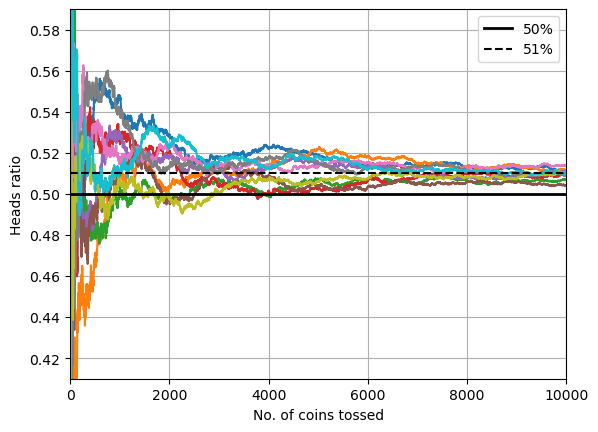

In [4]:
cum_heads_ratio=cumulative_heads/np.arange(1,10001).reshape(-1,1)

plt.plot(cum_heads_ratio)
plt.plot([0,10000],[0.5,0.5],"k-",linewidth=2,label="50%")
plt.plot([0,10000],[0.51,0.51],'k--',label="51%")
plt.xlabel("No. of coins tossed")
plt.ylabel("Heads ratio")
plt.legend()

plt.axis([0,10000,0.41,0.59])
plt.grid()
plt.show()


In [5]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=500,noise=0.3,random_state=42)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

voting_clf=VotingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('rf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(random_state=42))
    ]
)
voting_clf.fit(X_train,y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [6]:
for name,clf in voting_clf.named_estimators_.items():
    print(name,"=",clf.score(X_test,y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [7]:
voting_clf.score(X_test, y_test)


0.912

In [8]:
voting_clf.predict(X_test[:1])[0]

1

In [9]:
[clf.predict(X_test[:1])[0] for clf in voting_clf.estimators_]

[1, 1, 0]

In [10]:
voting_clf.voting="soft"
voting_clf.named_estimators["svc"].probability=True
voting_clf.fit(X_train,y_train)
voting_clf.score(X_test,y_test)

0.92

*How above internally works*
         ⬇️

In [12]:


voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    voting='soft'  # <-- Soft voting instead of hard
)

voting_clf.fit(X_train, y_train)
voting_clf.score(X_test,y_test)


0.92

# Bagging and Pasting


## Bagging and Pasting in Scikit-learn

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,n_jobs=-1,random_state=42)
bag_clf.fit(X_train,y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## Out-of-bag evaluation

In [17]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,n_jobs=-1,oob_score=True,
                         random_state=42)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.896

In [18]:
from sklearn.metrics import accuracy_score

y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.912